In [2]:
%matplotlib inline

import sys
import json
import warnings

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as snb; snb.set()

from sklearn import metrics

warnings.filterwarnings("ignore")

In [3]:
solution_file = '/datasets/pbn/solution_painter.csv'
submission_info_file = '/datasets/pbn/submission_info.csv'
info_file = '/datasets/pbn/all_data_info.csv'

labels = ['different-artist', 'same-artist']

strategy = 'mean'

### Reading Solution and Submission Info

In [4]:
solution, info, submission = map(pd.read_csv, (solution_file,
                                               info_file,
                                               submission_info_file))

[f.set_index('index', inplace=True) for f in [solution, submission]]
info.set_index('new_filename', inplace=True)
display(submission.head())

,image1,image2
index,,
0,100005.jpg,100004.jpg
1,100014.jpg,100004.jpg
2,100014.jpg,100005.jpg
3,100022.jpg,100004.jpg
4,100022.jpg,100005.jpg


In [5]:
info_features = 'artist_group in_train'.split()

z = submission.join(solution, how='left')
z = pd.merge(z, info[info_features], left_on='image1', right_on='new_filename', how='left')
z = pd.merge(z, info[info_features], left_on='image2', right_on='new_filename', how='left')

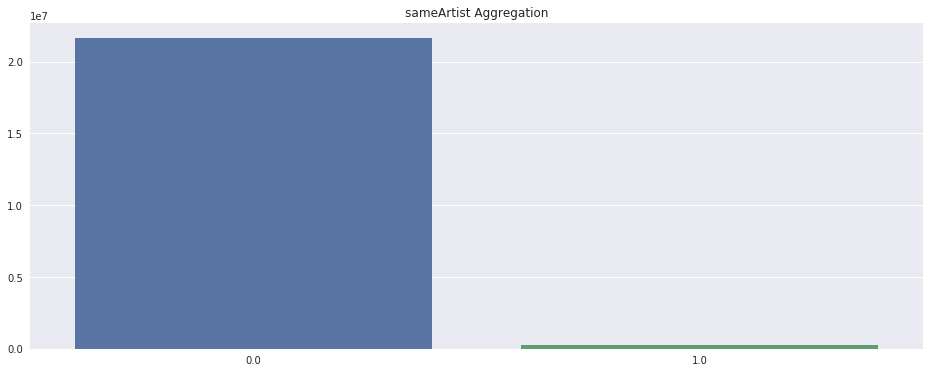

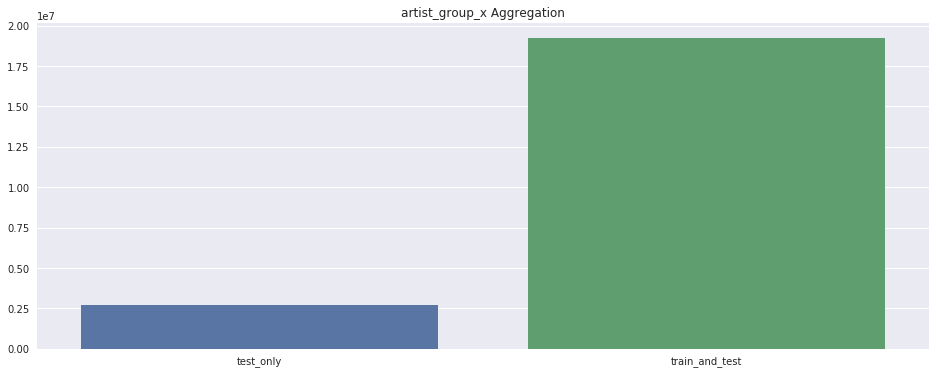

In [6]:
for column in 'sameArtist artist_group_x'.split():
    plt.figure(figsize=(16, 6))
    plt.title(f'{column} Aggregation')
    l, c = np.unique(z[column], return_counts=True)
    snb.barplot(x=l, y=c)

## Evaluating Answer

In [7]:
answers = [
    '/work/painter-by-numbers/wlogs/generate-softmax-l2/5/answer.csv',
    '/work/painter-by-numbers/wlogs/generate-softmax-sigmoid/1/answer.csv',
    '/work/painter-by-numbers/dl-08/painter-by-numbers/wlogs/answer-sigmoid-1024/1/answer-mean.csv',
    '/work/painter-by-numbers/dl-08/painter-by-numbers/wlogs/answer/5/answer-mean.csv',
    '/work/painter-by-numbers/dl-08/painter-by-numbers/wlogs/answer/7/answer-mean.csv',
    '/work/painter-by-numbers/results/pbn_random_299_inception_1763_answer.csv',
]

In [12]:
def confusion_matrix(y, c, tag):
    plt.figure()
    plt.title(f'Confusion Matrix {tag}')
    cm = metrics.confusion_matrix(y, c).astype('float')
    cm /= cm.sum(axis=1, keepdims=True)
    snb.heatmap(cm, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.2f')
    
def _evaluate(y, p, c, tag):
    try:
        print('    ROC auc:', metrics.roc_auc_score(y, p))
        print(metrics.classification_report(y, c))
        confusion_matrix(y, c, tag)
        
        plt.figure(figsize=(16, 6))
        plt.title(f'Answer Distribution for {tag}')
        snb.distplot(p)
    except ValueError as e:
        print(e, file=sys.stderr)

In [13]:
def evaluate(answer_file):
    print(f'\nEvaluating answer file "{answer_file}"')
    answer = pd.read_csv(answer_file)['sameArtist']
    
    print('  General evaluation:')
    _evaluate(z['sameArtist'],
              answer,
              answer >= .5,
              answer_file)

    for tag in ['train_and_test', 'test_only']:
        print(f'  Evaluation of sub-group {tag}:')
        selected = z['artist_group_x'] == tag
        zs, answer_s = z[selected], answer[selected]
        _evaluate(zs['sameArtist'],
                  answer_s,
                  answer_s >= .5,
                  tag=answer_file)


Evaluating answer file "/work/painter-by-numbers/wlogs/generate-softmax-l2/5/answer.csv"
  General evaluation:
    ROC auc: 0.831379516462424
             precision    recall  f1-score   support

        0.0       0.99      0.83      0.91  21628697
        1.0       0.05      0.64      0.09    287350

avg / total       0.98      0.83      0.89  21916047

  Evaluation of sub-group train_and_test:
    ROC auc: 0.8459770277111888
             precision    recall  f1-score   support

        0.0       1.00      0.83      0.90  18974410
        1.0       0.05      0.68      0.09    245917

avg / total       0.98      0.82      0.89  19220327

  Evaluation of sub-group test_only:
    ROC auc: 0.7606679740859003
             precision    recall  f1-score   support

        0.0       0.99      0.87      0.93   2654287
        1.0       0.05      0.40      0.08     41433

avg / total       0.97      0.86      0.91   2695720



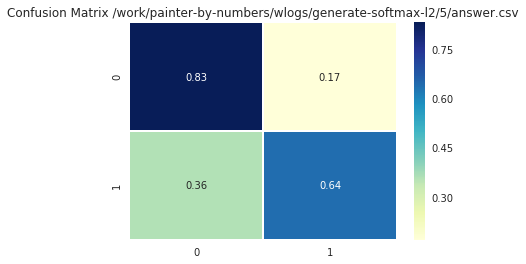

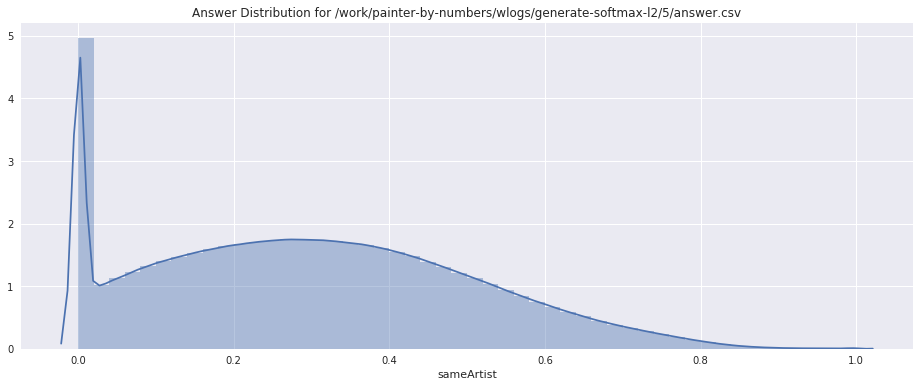

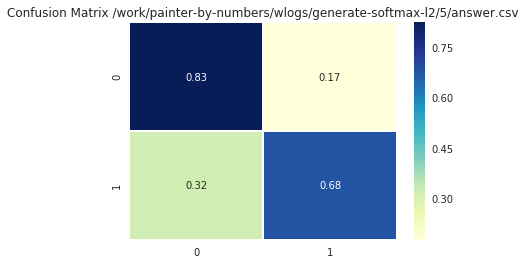

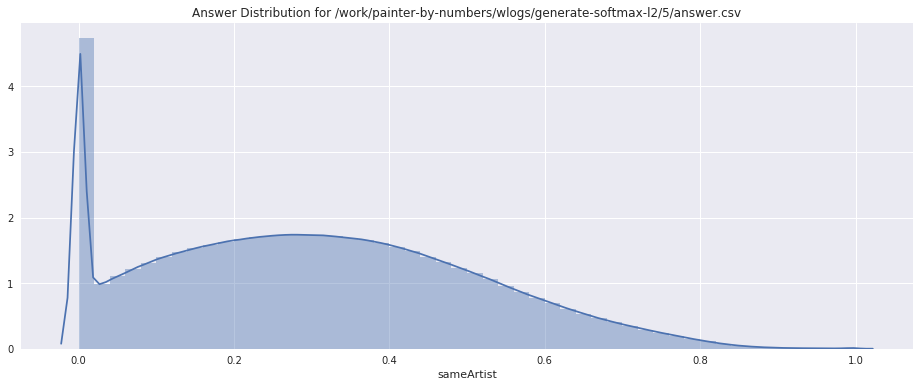

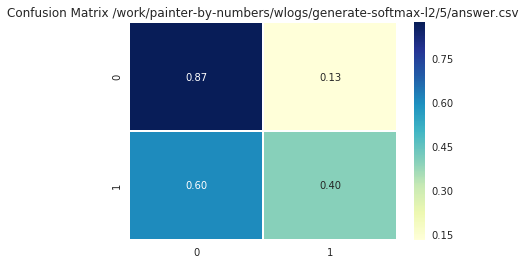

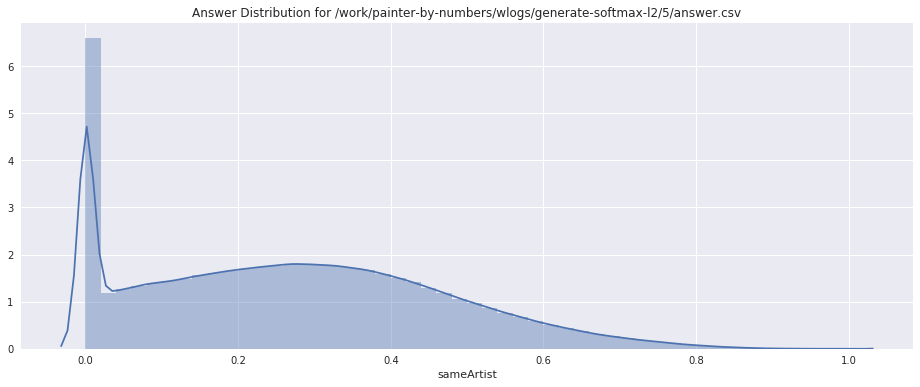

In [14]:
evaluate(answers[0])


Evaluating answer file "/work/painter-by-numbers/wlogs/generate-softmax-sigmoid/1/answer.csv"
  General evaluation:
    ROC auc: 0.8655822327688744
             precision    recall  f1-score   support

        0.0       1.00      0.76      0.86  21628697
        1.0       0.04      0.80      0.08    287350

avg / total       0.98      0.76      0.85  21916047

  Evaluation of sub-group train_and_test:
    ROC auc: 0.8785606827122966
             precision    recall  f1-score   support

        0.0       1.00      0.75      0.86  18974410
        1.0       0.04      0.83      0.08    245917

avg / total       0.98      0.76      0.85  19220327

  Evaluation of sub-group test_only:
    ROC auc: 0.7971153054154531
             precision    recall  f1-score   support

        0.0       0.99      0.79      0.88   2654287
        1.0       0.05      0.63      0.08     41433

avg / total       0.98      0.79      0.87   2695720



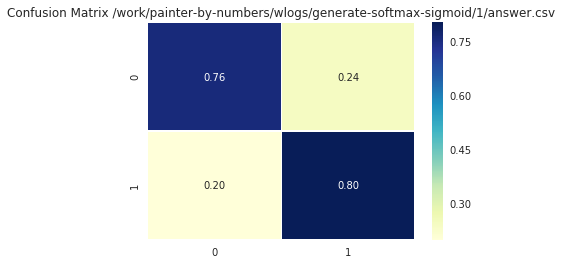

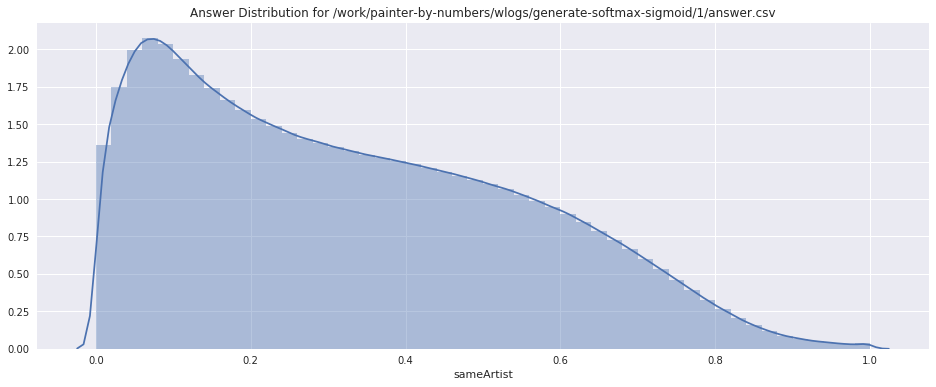

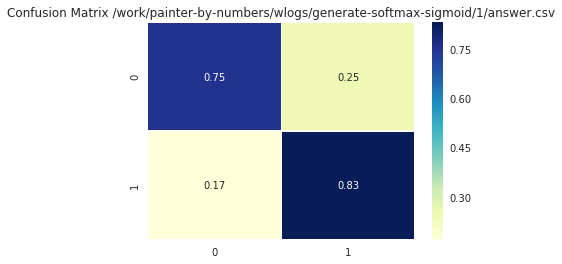

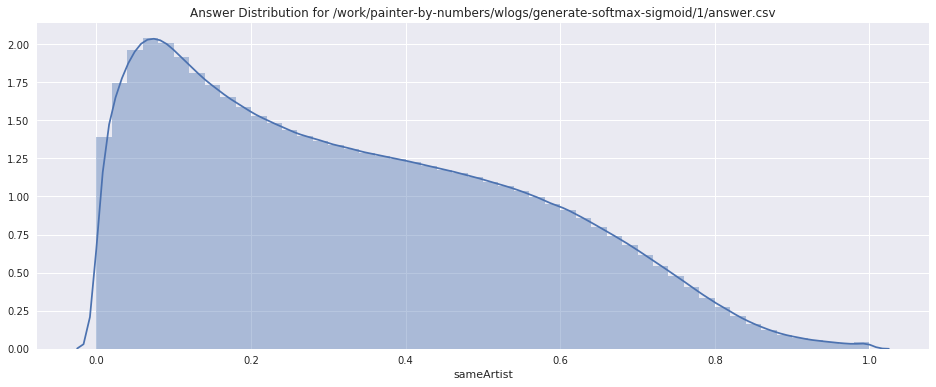

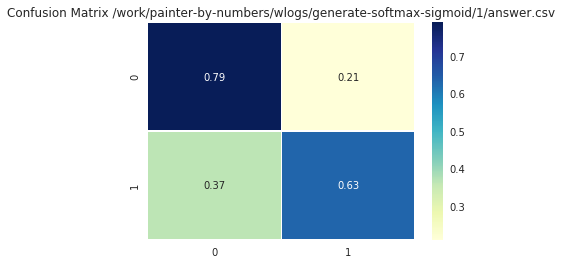

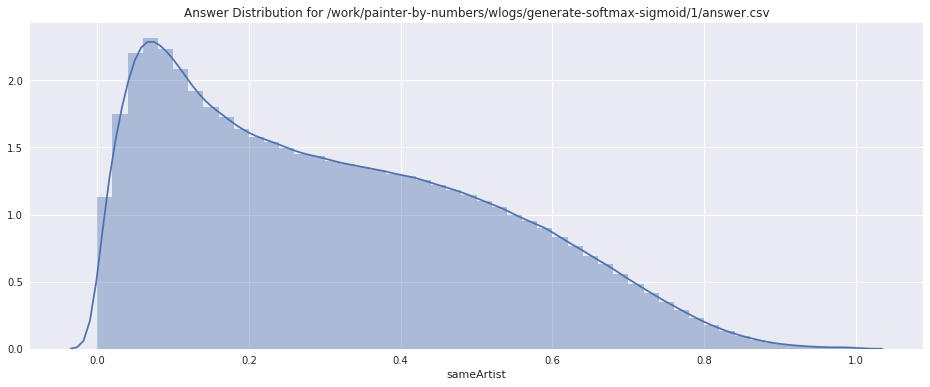

In [15]:
evaluate(answers[1])

In [16]:
evaluate(answers[2])


Evaluating answer file "/work/painter-by-numbers/dl-08/painter-by-numbers/wlogs/answer-sigmoid-1024/1/answer-mean.csv"
  General evaluation:


Found input variables with inconsistent numbers of samples: [21916047, 4312670]


  Evaluation of sub-group train_and_test:


Found input variables with inconsistent numbers of samples: [19220327, 3782006]


  Evaluation of sub-group test_only:


Found input variables with inconsistent numbers of samples: [2695720, 530664]



Evaluating answer file "/work/painter-by-numbers/dl-08/painter-by-numbers/wlogs/answer/5/answer-mean.csv"
  General evaluation:
    ROC auc: 0.8915438785223916
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99  21628697
        1.0       0.20      0.28      0.24    287350

avg / total       0.98      0.98      0.98  21916047

  Evaluation of sub-group train_and_test:
    ROC auc: 0.9007101584519471
             precision    recall  f1-score   support

        0.0       0.99      0.98      0.99  18974410
        1.0       0.21      0.31      0.25    245917

avg / total       0.98      0.98      0.98  19220327

  Evaluation of sub-group test_only:
    ROC auc: 0.8367167626681161
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99   2654287
        1.0       0.13      0.11      0.12     41433

avg / total       0.97      0.98      0.97   2695720



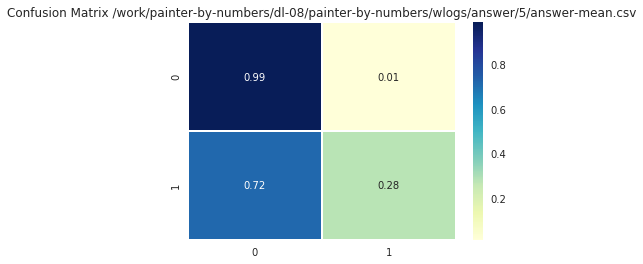

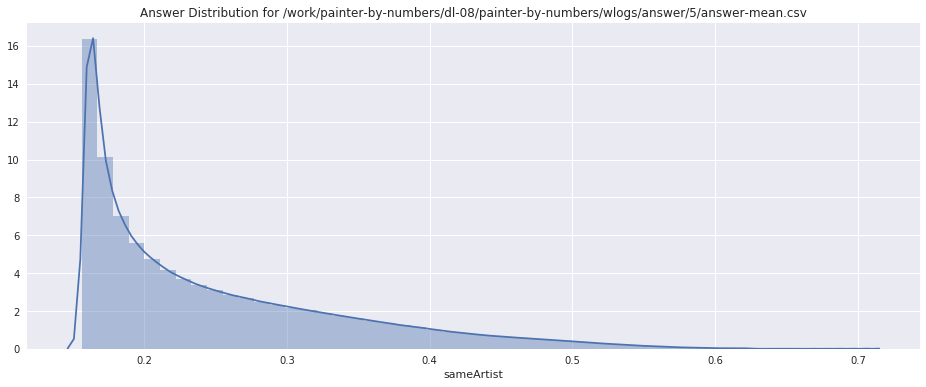

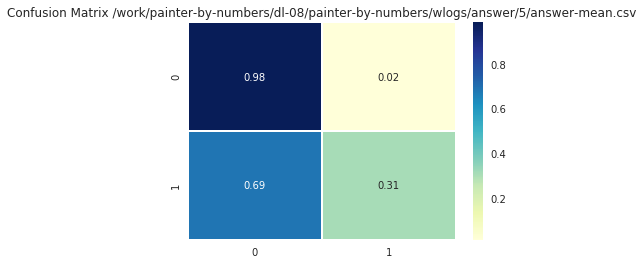

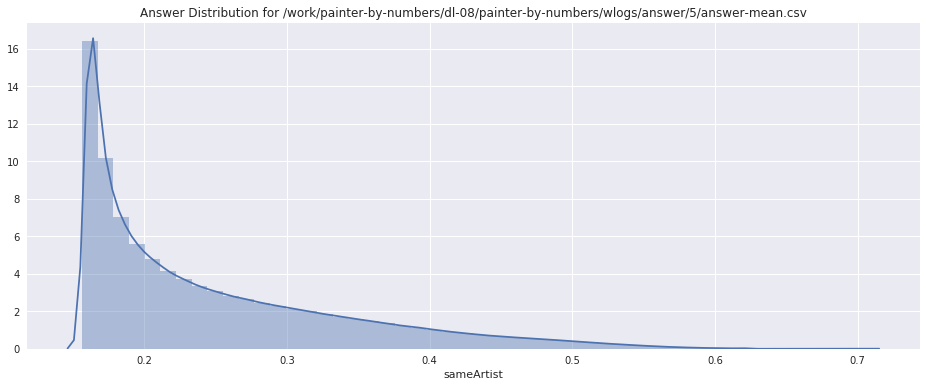

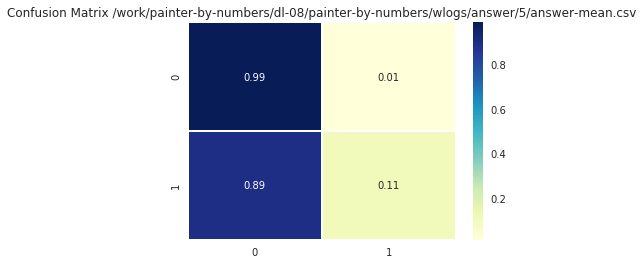

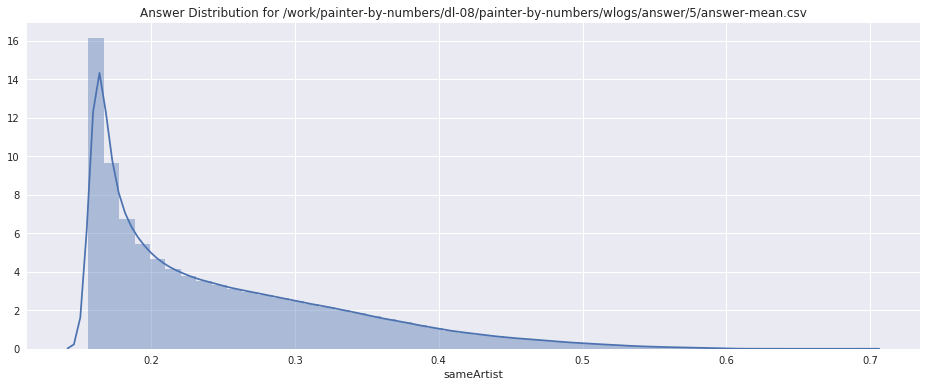

In [17]:
evaluate(answers[3])


Evaluating answer file "/work/painter-by-numbers/dl-08/painter-by-numbers/wlogs/answer/7/answer-mean.csv"
  General evaluation:
    ROC auc: 0.8976920592027495
             precision    recall  f1-score   support

        0.0       0.99      0.92      0.95  21628697
        1.0       0.09      0.63      0.16    287350

avg / total       0.98      0.91      0.94  21916047

  Evaluation of sub-group train_and_test:
    ROC auc: 0.908329330724609
             precision    recall  f1-score   support

        0.0       1.00      0.92      0.95  18974410
        1.0       0.09      0.67      0.16    245917

avg / total       0.98      0.91      0.94  19220327

  Evaluation of sub-group test_only:
    ROC auc: 0.8331335237551588
             precision    recall  f1-score   support

        0.0       0.99      0.93      0.96   2654287
        1.0       0.08      0.38      0.13     41433

avg / total       0.98      0.92      0.95   2695720



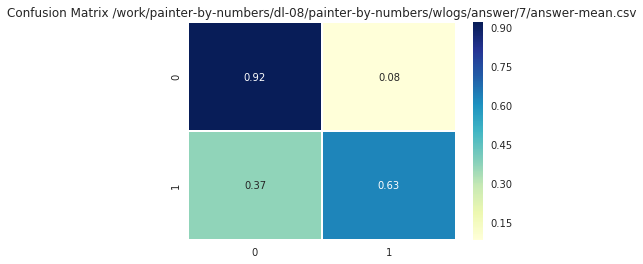

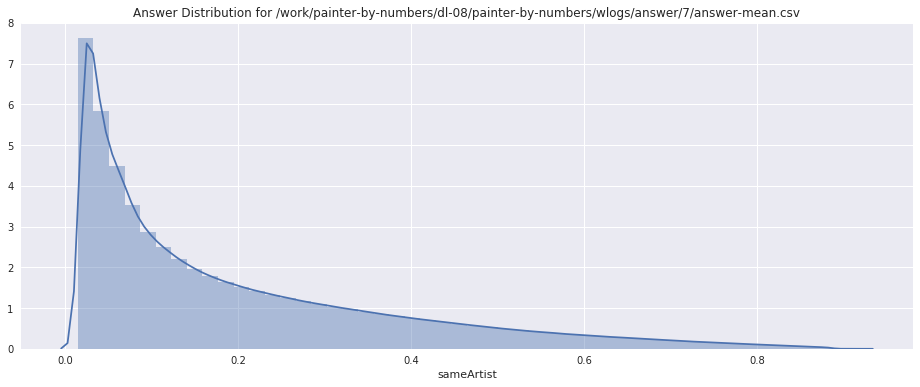

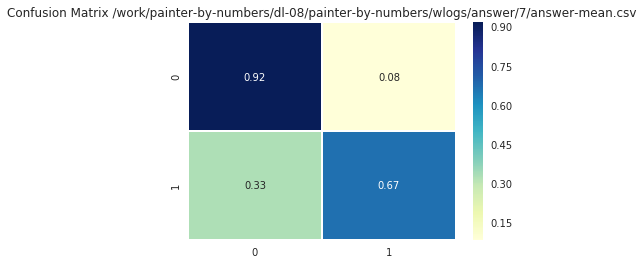

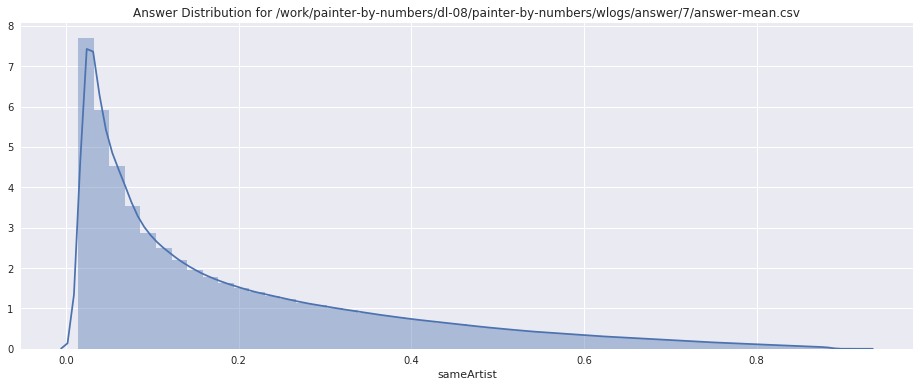

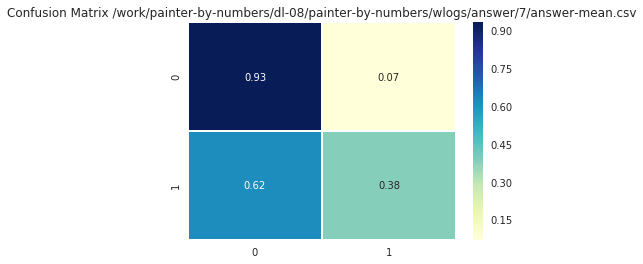

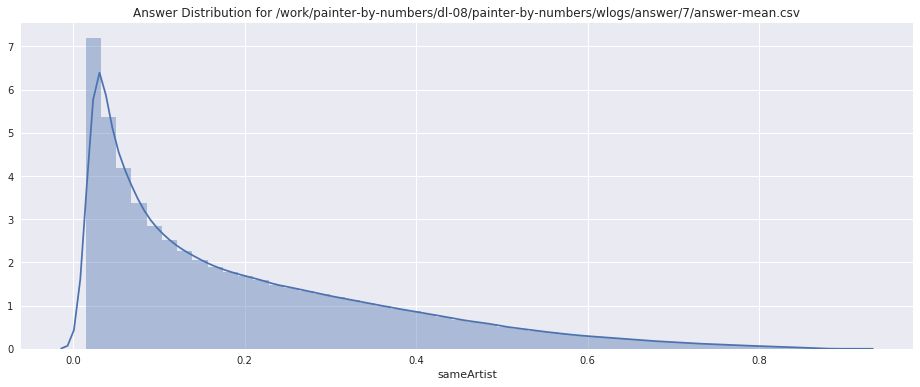

In [18]:
evaluate(answers[4])


Evaluating answer file "/work/painter-by-numbers/results/pbn_random_299_inception_1763_answer.csv"
  General evaluation:
    ROC auc: 0.8508314141255108
             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99  21628697
        1.0       0.19      0.07      0.10    287350

avg / total       0.98      0.98      0.98  21916047

  Evaluation of sub-group train_and_test:
    ROC auc: 0.8592352304235075
             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99  18974410
        1.0       0.21      0.07      0.10    245917

avg / total       0.98      0.98      0.98  19220327

  Evaluation of sub-group test_only:
    ROC auc: 0.7938571047128538
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99   2654287
        1.0       0.13      0.08      0.10     41433

avg / total       0.97      0.98      0.98   2695720



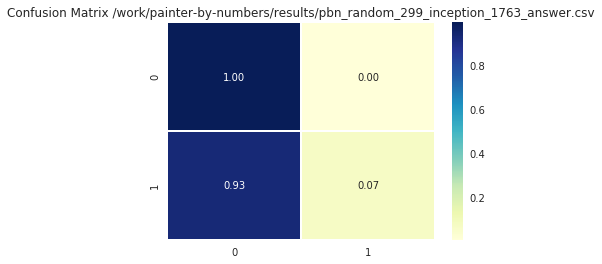

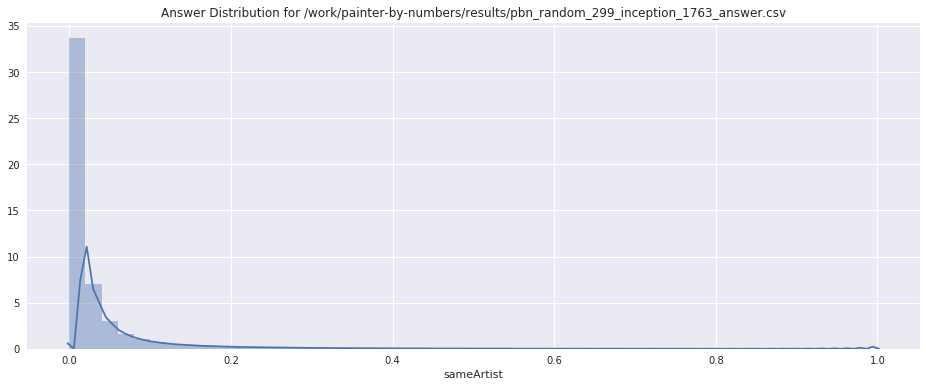

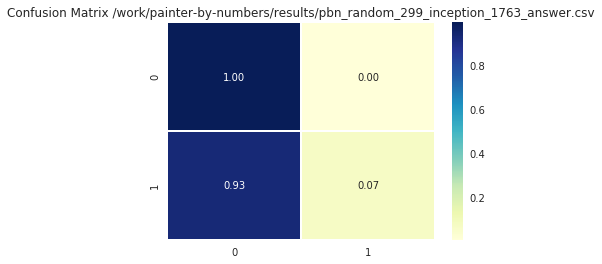

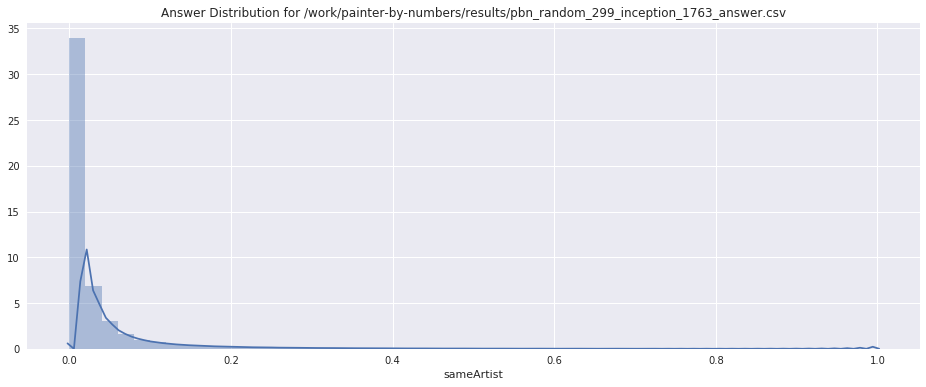

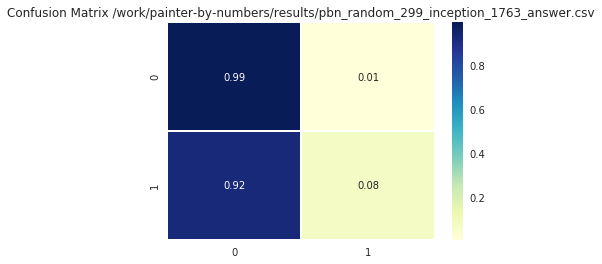

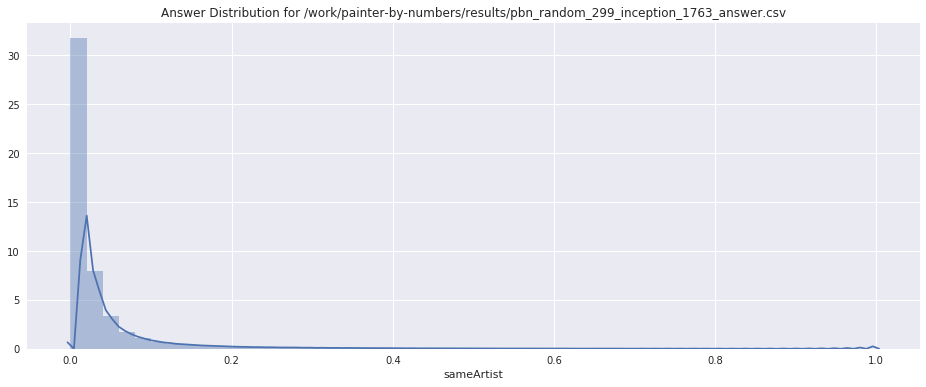

In [19]:
evaluate(answers[5])